### Student Information
Name:

Student ID:

GitHub ID:

Kaggle name:

Kaggle private scoreboard snapshot:

[Snapshot](img/pic0.png)

---

### Instructions

1. First: __This part is worth 30% of your grade.__ Do the **take home** exercises in the [DM2020-Lab2-Master Repo](https://github.com/fhcalderon87/DM2020-Lab2-Master). You may need to copy some cells from the Lab notebook to this notebook. 


2. Second: __This part is worth 30% of your grade.__ Participate in the in-class [Kaggle Competition](https://www.kaggle.com/c/dm2020-hw2-nthu/) regarding Emotion Recognition on Twitter. The scoring will be given according to your place in the Private Leaderboard ranking: 
    - **Bottom 40%**: Get 20% of the score (ie. 20% of 30% )

    - **Top 41% - 100%**: Get (101-x)% of the score, where x is your ranking in the leaderboard (ie. (101-x)% of 30% )   
    Submit your last submission __BEFORE the deadline (Dec. 5th 11:59 pm, Saturday)__. Make sure to take a screenshot of your position at the end of the competition and store it as '''pic0.png''' under the **img** folder of this repository and rerun the cell **Student Information**.
    

3. Third: __This part is worth 30% of your grade.__ A report of your work developping the model for the competition (You can use code and comment it). This report should include what your preprocessing steps, the feature engineering steps and an explanation of your model. You can also mention different things you tried and insights you gained. 


4. Fourth: __This part is worth 10% of your grade.__ It's hard for us to follow if your code is messy :'(, so please **tidy up your notebook** and **add minimal comments where needed**.


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/fhcalderon87/DM2020-Lab1-Master/blob/master/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb), but make sure to fork the [DM2020-Lab2-Homework](https://github.com/fhcalderon87/DM2020-Lab2-Homework) repository this time! Also please __DON´T UPLOAD HUGE DOCUMENTS__, please use Git ignore for that.

Make sure to commit and save your changes to your repository __BEFORE the deadline (Dec. 8th 11:59 pm, Tuesday)__. 

In [1]:
### Begin Assignment Here

---
### ** >>> Exercise 1 (Take home): **  
Plot word frequency for Top 30 words in both train and test dataset. (Hint: refer to DM lab 1)

In [2]:
import pandas as pd
import pickle
from sklearn.feature_extraction.text import CountVectorizer

from helpers import data_mining_helpers as dmh

train_df = pd.read_pickle('./data/train_df.pkl')
test_df = pd.read_pickle('./data/test_df.pkl')

train_df['unigrams'] = train_df['text'].apply(lambda x: dmh.tokenize_text(x, remove_stopwords=True, remove_punctuation=True))
test_df['unigrams'] = test_df['text'].apply(lambda x: dmh.tokenize_text(x, remove_stopwords=True, remove_punctuation=True))

count_vect = CountVectorizer(stop_words='english')
count_vect.fit(train_df.text)
train_counts = count_vect.transform(train_df.text)
test_counts = count_vect.transform(test_df.text)

In [3]:
train_word_count = pd.DataFrame(columns=count_vect.get_feature_names(), data=train_counts.toarray())
test_word_count = pd.DataFrame(columns=count_vect.get_feature_names(), data=test_counts.toarray())

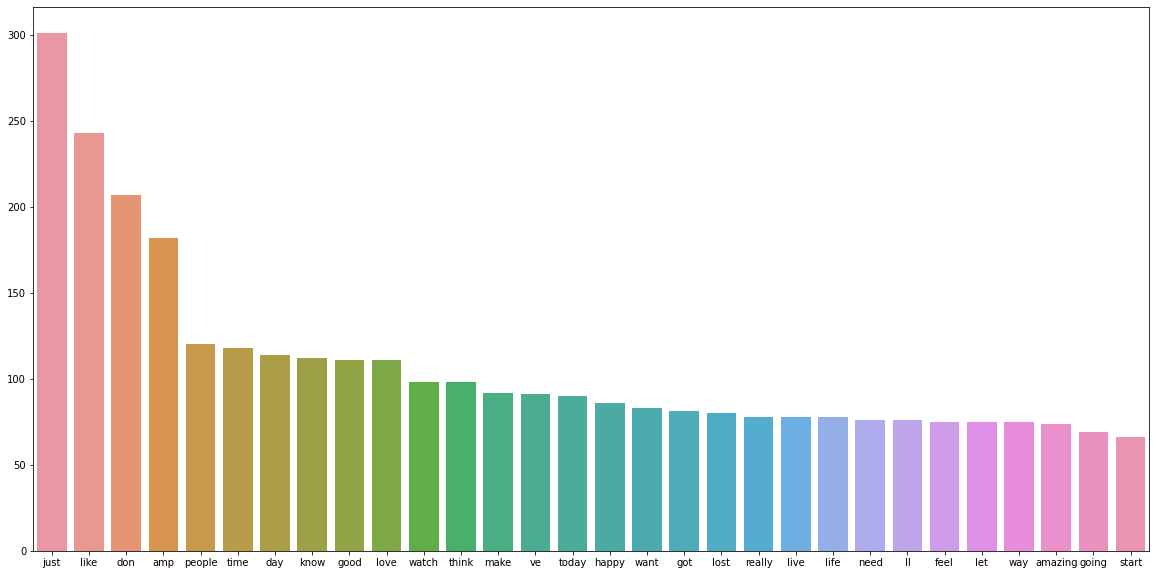

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

train_word_fequency = train_word_count.sum(axis=0).sort_values(ascending=False)[:30]
ax = sns.barplot(x=train_word_fequency.index, y=train_word_fequency)
ax.figure.set_size_inches(20,10)

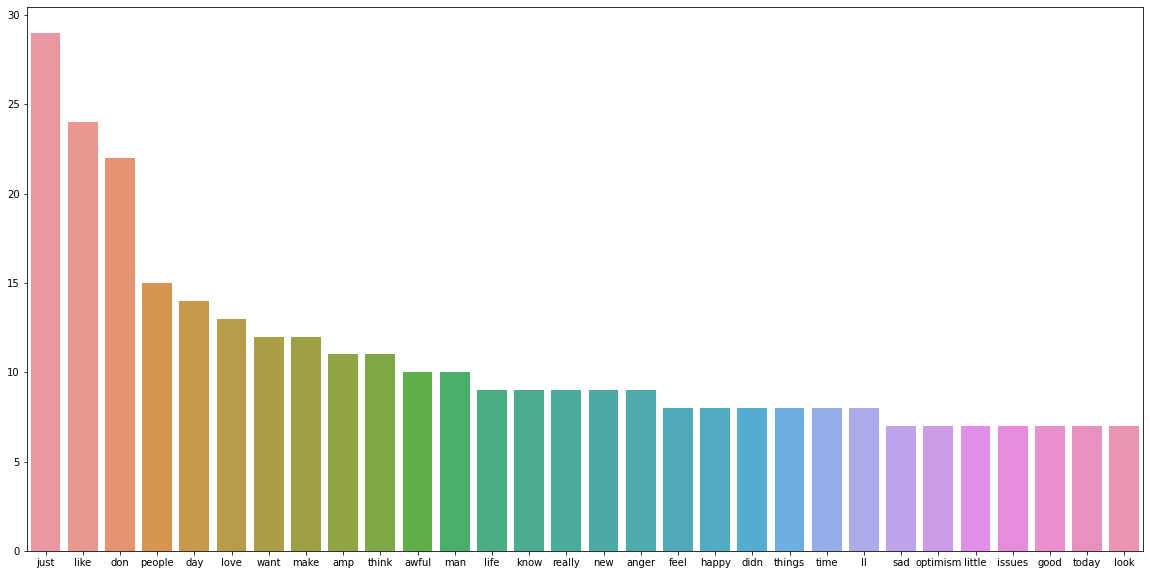

In [5]:
test_word_fequency = test_word_count.sum(axis=0).sort_values(ascending=False)[:30]
ax = sns.barplot(x=test_word_fequency.index, y=test_word_fequency)
ax.figure.set_size_inches(20,10)

---
### ** >>> Exercise 2 (Take home): **  
Generate an embedding using the TF-IDF vectorizer instead of th BOW one with 1000 features and show the feature names for features [100:110].

In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk

# build analyzers (td-idf)
TDIDF_1000 = TfidfVectorizer(max_features=1000, tokenizer=nltk.word_tokenize) 

# apply analyzer to training data
TDIDF_1000.fit(train_df['text'])
TDIDF_1000.get_feature_names()[100:110]

/Users/manu/data_mining/venv/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:484: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"


['awareness',
 'away',
 'awe',
 'awesome',
 'awful',
 'b',
 'baby',
 'back',
 'bad',
 'ball']

![confusion](pics/confusion.png)

---
### ** >>> Exercise 3 (Take home): **  
Can you interpret the results above? What do they mean?

Note: I believe the axis labels of the image above are inverted; usually the 'True label' axis is the vertical one and the 'Predicted label' axis is the horizontal one. This is true also here: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html#sklearn.metrics.plot_confusion_matrix
Plotting the Decision Tree's evaluation results using the scikit-learn method produces an output that confirms what I'm stating here. (Plot included below)

A confusion matrix for multiclass classification shows the number of predictions split by class.
The values on the diagonal are true positives for a class - i.e. the number of times that class has been predicted correctly.
From the matrix above we can see that the class 'fear' has been predicted right more than the others, although the class ditribution showed that 'fear' occurs more times than the other classes. We can also see that some classes are discerned better than others - e.g. 3 times we predicted 'sadness' when it really was 'anger' and 8 times the inverse, while 12 times we predicted 'fear' when it really was 'anger' and 15 times the inverse, hinting that perhaps 'fear' is harder to discrimnate from 'anger' than 'sadness' is). In any case, the effect is too small to be a real cause of concern.


![confusion_2](pics/confusion_2.png)

---
### ** >>> Exercise 4 (Take home): **  
Build a model using a ```Naive Bayes``` model and train it. What are the testing results? 

*Reference*: https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html

X_train.shape:  (3613, 1000)
y_train.shape:  (3613,)
X_test.shape:  (347, 1000)
y_test.shape:  (347,)
----------------------------
training accuracy: 0.9
testing accuracy: 0.78
----------------------------
              precision    recall  f1-score   support

       anger       0.77      0.77      0.77        84
        fear       0.72      0.84      0.78       110
         joy       0.85      0.78      0.82        79
     sadness       0.79      0.68      0.73        74

    accuracy                           0.78       347
   macro avg       0.79      0.77      0.77       347
weighted avg       0.78      0.78      0.77       347



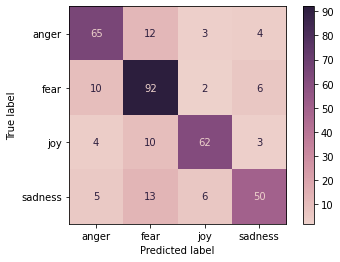

In [7]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import plot_confusion_matrix

X_train = TDIDF_1000.transform(train_df['text'])
y_train = train_df['emotion']

X_test = TDIDF_1000.transform(test_df['text'])
y_test = test_df['emotion']

print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape)
print('y_test.shape: ', y_test.shape)
print('----------------------------')

MNB_model = MultinomialNB(alpha=0.01)
MNB_model = MNB_model.fit(X_train, y_train)

y_train_pred = MNB_model.predict(X_train)
y_test_pred = MNB_model.predict(X_test)

acc_train = accuracy_score(y_true=y_train, y_pred=y_train_pred)
acc_test = accuracy_score(y_true=y_test, y_pred=y_test_pred)

print('training accuracy: {}'.format(round(acc_train, 2)))
print('testing accuracy: {}'.format(round(acc_test, 2)))
print('----------------------------')
print(classification_report(y_true=y_test, y_pred=y_test_pred))
plot_confusion_matrix(MNB_model, X_test, y_test, cmap=sns.cubehelix_palette(as_cmap=True))

---
### ** >>> Exercise 5 (Take home): **  

How do the results from the Naive Bayes model and the Decision Tree model compare? How do you interpret these differences? Use the theoretical background covered in class to try and explain these differences.

The Naive Bayes model seems to do better than the decision tree when it comes to accuracy, prediction, recall and f1-score.
Both models seem to achieve suspiciously high training accuracy (especially the Decision tree model) when compared to testing accuracy. This suggest overfit for both models, although much more severe on the Decision Tree.
While the proportion of correct predictions doesn't change much between the 2 models, we can see that in the Naive Bayes model there is a disproportionate number of false positives for the class 'fear', indicating that the model is over-predicting the most frequent class.
Decision trees are prone to overfitting, especially with a low number of examples (and high number of features) like ours. 
One possible solution to overfitting could be pruning the tree, or setting a maximum depth or a maximum number of leaves.
Additionally, we know that the frequency of a certain word can be a predictor to the frequency of another because of the varying probabililty of 2 given words appearing together. This means that our features are not independent, and decision trees don't handle correlated featues too well.

---
### ** >>> Exercise 6 (Take home): **  

Plot the Training and Validation Accuracy and Loss (different plots), just like the images below (Note: the pictures below are an example from a different model). How to interpret the graphs you got? How are they related to the concept of overfitting/underfitting covered in class?
<table><tr>
    <td><img src="pics/pic3.png" style="width: 300px;"/> </td>
    <td><img src="pics/pic4.png" style="width: 300px;"/> </td>
</tr></table>

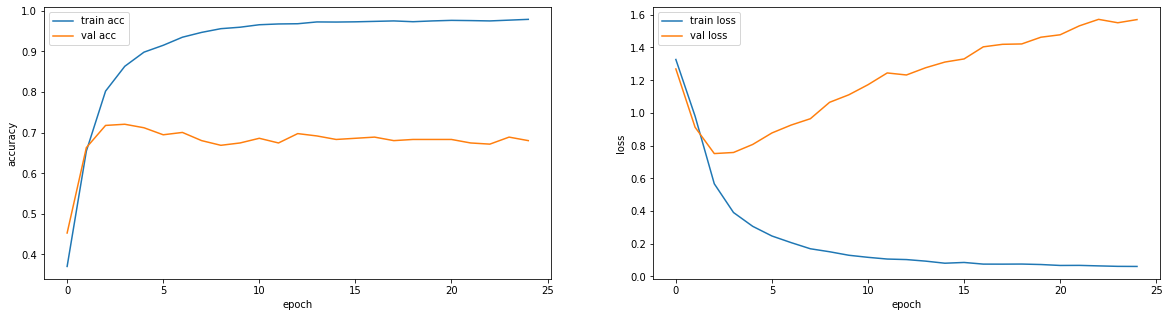

In [28]:
training_log = pd.DataFrame()
training_log = pd.read_csv("logs/training_log.csv")
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(20, 5)

sns.lineplot(x=training_log.epoch, y=training_log.accuracy, ax=ax1, label='train acc')
sns.lineplot(x=training_log.epoch, y=training_log.val_accuracy, ax=ax1, label='val acc')
sns.lineplot(x=training_log.epoch, y=training_log.loss, ax=ax2, label='train loss')
sns.lineplot(x=training_log.epoch, y=training_log.val_loss, ax=ax2, label='val loss')
plt.legend()
plt.show()

The graphs above show the model improving during the 25 epochs of training - loss is decreasing and accuracy is increasing until it plateaus. However, we can see that both validation accuracy and loss closely follow their training counterparts for a few epochs but depart soon after, with accuracy being stable at around 0.7 and loss going from 0.8 to 1.6. This indicates that the model is failing to generalize over unseen data, in other words overfitting.

---
### ** >>> Exercise 7 (Take home): **  

Now, we have the word vectors, but our input data is a sequence of words (or say sentence). 
How can we utilize these "word" vectors to represent the sentence data and train our model?

In [43]:
from gensim.models import KeyedVectors

## Note: this model is very huge, this will take some time ...
model_path = "data/GoogleNews/GoogleNews-vectors-negative300.bin.gz"
w2v_google_model = KeyedVectors.load_word2vec_format(model_path, binary=True)

In [50]:
import gensim.downloader as api

## If you see `SSL: CERTIFICATE_VERIFY_FAILED` error, use this:
import ssl
import urllib.request
ssl._create_default_https_context = ssl._create_unverified_context

glove_twitter_25_model = api.load("glove-twitter-25")
print('load ok')

glove_twitter_25_model.most_similar('happy', topn=10)

load ok


[('birthday', 0.9577817916870117),
 ('thank', 0.9376667141914368),
 ('welcome', 0.9336150288581848),
 ('love', 0.9176183938980103),
 ('miss', 0.916450023651123),
 ('hello', 0.9158351421356201),
 ('thanks', 0.9150084257125854),
 ('merry', 0.9053248763084412),
 ('bless', 0.9027323126792908),
 ('wish', 0.9013165831565857)]

In [64]:
import numpy as np
def make_sentence_vector_google(row):
    n_words = 0
    sentence_vector = np.zeros(300)
    for word in row['unigrams']:
        try:
            sentence_vector  += w2v_google_model.get_vector(word)
            n_words += 1
        except KeyError:
            print(f'word {word} not found') 
    return sentence_vector / n_words

train_df['sentence_vector'] = train_df.apply(make_sentence_vector_google, axis=1)
test_df['sentence_vector'] = test_df.apply(make_sentence_vector_google, axis=1)
    
# Many words - especially emojis and named entities are not being found

word realDonaldTrump not found
word KellyannePolls not found
word ... not found
word Trump2016 not found
word yourefired not found
word MartyrsNotBeggars not found
word twlldun not found
word bbcquestiontime not found
word JacobReesMogg not found
word leicesterliz not found
word normanlamb not found
word CarolineLucas not found
word JuliaHB1 not found
word PeopleLikeMeBecause not found
word BigDaddyx47 not found
word MannyM83 not found
word DareToReagan not found
word Oregon/Baylor not found
word ashleynwinters not found
word ContentwiththeLordsPortion not found
word days. not found
word 90:14 not found
word 🔥Anger not found
word poured.🔥 not found
word \n\n~Mark not found
word 'failure not found
word 16K not found
word tiagotatamotors not found
word TataMotors not found
word raylewis not found
word theydontlikeyoueither not found
word unwoke not found
word 's not found
word bond/friendship not found
word WeirdWednesday not found
word jump-scared not found
word code-brown not found
wor

<ipython-input-64-28d6d7de7a9b>:11: RuntimeWarning: invalid value encountered in true_divide
  return sentence_vector / n_words



word nimber not found
word worsethananatomicbomb not found
word accidentlyspillbeeronthecarpet not found
word JackAndJack not found
word listen💗😀 not found
word kohara19 not found
word FraserKeegan not found
word leesyatt not found
word therewillbeblood not found
word XUcQb not found
word OilersFanSean not found
word The_Currys not found
word 's not found
word cHd not found
word HebertofNH not found
word  not found
word .. not found
word 's not found
word amityaffliction not found
word dailyfeels not found
word ... not found
word JasonBHampton not found
word 's not found
word Netflix_ME not found
word liamch88 not found
word BlizzHeroes not found
word 'players not found
word HotS not found
word deshbhakthoon not found
word centre not found
word 's not found
word veggiesausage not found
word ... not found
word .. not found
word no😝😝😝 not found
word live.ly not found
word jaredhorgan not found
word marthalyssa not found
word MoneyJay901 not found
word Ms_HeartAttack not found
word 's n

word immortalbulldog not found
word firstleeds not found
word LeKingCoq not found
word MistaAggy not found
word GiovanniiDC not found
word PeanutRD not found
word MelissaJoyRD not found
word SarahKoszykRD not found
word eat4performance not found
word rustnutrition not found
word jenhaugen not found
word VodafoneUKhelp not found
word VodafoneUK not found
word £44.77 not found
word £148 not found
word live.ly not found
word paulzimmer not found
word 'get not found
word 'be not found
word Olajide_Shutti not found
word lmaoo not found
word Singaholic121 not found
word 's not found
word autumnmemories not found
word annabailey not found
word FallSongs not found
word ... not found
word 's not found
word SpookyTv not found
word LEAFYSZERKER not found
word markiplier not found
word 's not found
word 's not found
word justsaying not found
word 💕✨ not found
word 🙄 not found
word AINT not found
word rubeseatsinfo not found
word 's not found
word LifeProof not found
word cancelled not found
word 6

word NaziaMemon01 not found
word .. not found
word son-in-law not found
word 's not found
word prosecution/imprisonment not found
word EAMaddenNFL not found
word EASPORTS not found
word elway not found
word eatcake not found
word 's not found
word 😞 not found
word el_tityboi not found
word 's not found
word .. not found
word BoudicaRides not found
word realkingrobbo not found
word ClintonMafia not found
word BTCare not found
word willynilly not found
word 2/5 not found
word SoCalValerie not found
word 🕋 not found
word ... not found
word 😐 not found
word TNFryed not found
word JogglingDroid not found
word BrancoCarmine not found
word Otto_English not found
word rkuuleiq not found
word best/beast not found
word God/s not found
word aTheism not found
word biBle not found
word 's not found
word cherebork not found
word MelissaJoyRD not found
word SarahKoszykRD not found
word eat4performance not found
word rustnutrition not found
word jenhaugen not found
word Retweeted not found
word RandPa

word corruptmelon not found
word live.ly not found
word brooke_bridges not found
word VileBairn not found
word \n\n not found
word “ not found
word ” not found
word “ not found
word ’ not found
word 12:11-12 not found
word 50 not found
word HoustonTexans not found
word 20 not found
word 20 not found
word 's not found
word ... not found
word sike not found
word JoshNoneYaBiz not found
word JackHoward not found
word BritishBakeOff not found
word 's not found
word 'soggy not found
word V-dog not found
word 's not found
word 37 not found
word BlackishWriters not found
word ChrisChristie not found
word credentials-You not found
word more-No not found
word TrumpPuppet not found
word jersey4sale not found
word bobcesca_go not found
word sesmithesq not found
word \nDid not found
word 2000 not found
word -- not found
word 12 not found
word solate not found
word realised not found
word thehill not found
word 's not found
word low-energy not found
word 's not found
word harvest16 not found
word '

word TheDrum not found
word Anychance not found
word 630am not found
word 10golds24 not found
word neverquit not found
word dreambig not found
word TeamTTO not found
word going4gold not found
word narcissusheiyan not found
word yawnoff not found
word Slippus not found
word PureGym not found
word ... not found
word DeionSandersJr not found
word DeionSanders not found
word ... not found
word ThisIsUs not found
word isthereahelplineforthis not found
word NFYFC not found
word Wilkster_ not found
word yf not found
word 🙄 not found
word KevinCanWaitCBS not found
word RogerFedererShop not found
word doesn´t not found
word work.😰 not found
word bdp514am not found
word len_snart not found
word He- not found
word RobdotThom not found
word sulphurhoops not found
word LonelyGoomba not found
word serendipity127_ not found
word zombiecalorie not found
word Angel_Eyes66 not found
word 's not found
word 💭 not found
word ☺️ not found
word -- not found
word ThisIsUs not found
word isthereahelplineforthi

word JeffersonLake not found
word .. not found
word ... not found
word .. not found
word youraffair not found
word kikme not found
word messageme not found
word textme not found
word tradepics not found
word ZubairSabirPTI not found
word 'Molna not found
word CovinoandRich not found
word back2back not found
word 's not found
word 's not found
word ThursdayThoughts not found
word TrueAggieFan not found
word 's not found
word 4-2 not found
word 🇨🇦 not found
word GameGrumps not found
word Geminiak not found
word LondonNPC not found
word wordgeek not found
word \nAlso not found
word 😀 not found
word joey_coops not found
word pbhushan1 not found
word IndianExpress not found
word 's not found
word angryman not found
word IllinoisLoyalty not found
word \nHopefully not found
word tomorrow.\nBut not found
word LaureEve not found
word anxietyproblems not found
word S/O not found
word ... not found
word w/ not found
word Kait🙃 not found
word Luthansa not found
word €400 not found
word €30 not fou

word CesarSampao not found
word thisisbolton not found
word centre not found
word 18 not found


In [63]:
def make_sentence_vector_twitter(row):
    n_words = 0
    sentence_vector = np.zeros(25)
    for word in row['unigrams']:
        try:
            sentence_vector  += glove_twitter_25_model.get_vector(word)
            n_words += 1
        except KeyError:
            print(f'word {word} not found') 
    return sentence_vector / n_words

train_df['sentence_vector_2'] = train_df.apply(make_sentence_vector_twitter, axis=1)
test_df['sentence_vector_2'] = test_df.apply(make_sentence_vector_twitter, axis=1)

# Same problem here

word realDonaldTrump not found
word KellyannePolls not found
word New not found
word ... not found
word I not found
word I not found
word Trump2016 not found
word yourefired not found
word We not found
word MartyrsNotBeggars not found
word twlldun not found
word bbcquestiontime not found
word JacobReesMogg not found
word leicesterliz not found
word normanlamb not found
word CarolineLucas not found
word JuliaHB1 not found
word Oh not found
word Brewer not found
word The not found
word PeopleLikeMeBecause not found
word I not found
word BigDaddyx47 not found
word I not found
word I not found
word 2 not found
word 3 not found
word MannyM83 not found
word DareToReagan not found
word I not found
word HATE not found
word I not found
word Oregon/Baylor not found
word I not found
word ashleynwinters not found
word I not found
word I not found
word ContentwiththeLordsPortion not found
word O not found
word Ps not found
word 90:14 not found
word I not found
word 🔥Anger not found
word poured.🔥 no

<ipython-input-63-81f883ab87ea>:10: RuntimeWarning: invalid value encountered in true_divide
  return sentence_vector / n_words


word 😭 not found
word Beats not found
word fire-ea not found
word JoeGoodmanJr not found
word A not found
word But not found
word welfarereform not found
word 'model not found
word AllredMD not found
word KerryCallen not found
word thismanthispete not found
word Kirby not found
word Black not found
word Panther not found
word How not found
word Who not found
word ... not found
word I not found
word Are not found
word Wycelv not found
word Joey7Barton not found
word I not found
word Joey not found
word England not found
word .. not found
word .. not found
word Watch not found
word live.ly not found
word thebrandonrobert not found
word Candice not found
word 👊🏻🙄 not found
word And not found
word 😓 not found
word I not found
word 93.7 not found
word In not found
word AldiToHarrods not found
word I not found
word I not found
word LindseySanford not found
word simplymeasured not found
word Swear not found
word God not found
word 8 not found
word 6 not found
word British not found
word Gas n

word Do not found
word That not found
word GrandDesigns not found
word Positive not found
word 10 not found
word 88 not found
word 10 not found
word Accept not found
word So not found
word victory.\n\nTOMIHO not found
word IpaglabanMo not found
word TapingDay2 not found
word thetwattickla not found
word NottRihanna not found
word followAdamA not found
word Speechless not found
word The not found
word I not found
word Channel4 not found
word I not found
word Airbnb not found
word dreamornightmare not found
word CazuaL_WeaR not found
word ScottInSC not found
word itsagunalright not found
word Most not found
word Americans not found
word Government not found
word BS not found
word BS not found
word RiggedSystem not found
word oreillyfactor not found
word Christmas not found
word 😍😍😍 not found
word I not found
word LOVE not found
word IT not found
word 💕 not found
word TaraSetmayer not found
word oliverdarcy not found
word AA not found
word N not found
word Why not found
word Ignorant not 

word Yes not found
word Some not found
word By not found
word I not found
word \n not found
word 15 not found
word sunriseyoga not found
word bodyawareness not found
word BeeTuppy not found
word We not found
word We not found
word We not found
word Never not found
word Crossword not found
word portentous not found
word rootstock not found
word scruple not found
word ... not found
word SilkInSide not found
word TommyJoeRatliff not found
word I not found
word littlemore20 not found
word I not found
word Italian not found
word Honey not found
word FurryTails not found
word Venice not found
word Hopefully not found
word I not found
word Best not found
word Buy not found
word I not found
word 1DayAtaTime not found
word When not found
word Internet not found
word I not found
word There not found
word I not found
word I not found
word I not found
word ... not found
word ManUnitedWriter not found
word He not found
word rashford not found
word Ellie not found
word myspanishboots not found
word 

word 😭😭 not found
word __KirstyGA not found
word oldcunt not found
word DailyMailCeleb not found
word KTHopkins not found
word Katie not found
word I not found
word 'normal not found
word Really not found
word kelly_welles not found
word Made not found
word And not found
word This not found
word ... not found
word ⚓️ not found
word ... not found
word 'everywhere not found
word .. not found
word barns/wine not found
word overflow.Everything not found
word do_u_see not found
word ContourCosmetic not found
word A not found
word A not found
word I not found
word I not found
word I not found
word aIakazamjackass not found
word It not found
word My not found
word 😂😂😂 not found
word A not found
word Lysol not found
word Febreeze not found
word Follow not found
word Snapchat not found
word 👻 not found
word Carlabtst15 not found
word In not found
word My not found
word 😐 not found
word WELLL not found
word AT not found
word LEAST not found
word Joys\n\n not found
word problemsolving not found
w

word I not found
word .. not found
word Rojo not found
word India not found
word ..... not found
word \n\n not found
word .......... not found
word Fly_Norwegian not found
word worstairline not found
word I not found
word beyondajoke not found
word Fosu-Mensa not found
word 15 not found
word Difference not found
word Premier not found
word League not found
word League not found
word 1 not found
word Fosu not found
word Mensah not found
word It not found
word Northamptons not found
word We not found
word MohammedSomaa01 not found
word T.roles not found
word Support not found
word davidpreece12 not found
word FitbaHacks not found
word Great not found
word Did not found
word Russel not found
word 90 not found
word GreensACT not found
word ShaneRattenbury not found
word carolinelec not found
word CanberraAirport not found
word Most not found
word Mr not found
word Barr not found
word camilluddington not found
word YOURE not found
word It not found
word Kingdom not found
word God not found


word Liverpool not found
word Anfield not found
word COYS not found
word I not found
word I not found
word GBBO not found
word I not found
word Do not found
word Use not found
word No not found
word I not found
word So not found
word .\nA not found
word I not found
word 😳 not found
word What not found
word I not found
word I not found
word day5 not found
word Show not found
word Take not found
word WorkTiveTruth not found
word So not found
word Mary not found
word Berry not found
word Mel not found
word Sue not found
word PaulHollywood not found
word GBBO not found
word _JuliaSteiner not found
word I not found
word She not found
word Saga not found
word When not found
word I not found
word 2 not found
word I not found
word YouTube not found
word youtubegaming not found
word We not found
word Your not found
word feet\nWhere not found
word meet\nAnd not found
word washed\nBy not found
word stream\n—Graham not found
word Kendrick not found
word I not found
word up.- not found
word DritaDa

word BS not found
word BS not found
word RiggedSystem not found
word oreillyfactor not found
word Can not found
word 2 not found
word This not found
word keyshamackie not found
word Drop not found
word ... not found
word Watch not found
word live.ly not found
word swagrman_fan not found
word Oh not found
word I not found
word TexasTech not found
word Texans not found
word TNF not found
word texansarebad not found
word 4 not found
word 😙❤❤❤ not found
word thecandeyman not found
word Malins not found
word McCreadie not found
word Decent not found
word Lewes_cfc not found
word I not found
word Natalie not found
word The not found
word bringyouhome2 not found
word I not found
word FAIR not found
word musicfae15 not found
word He not found
word Am not found
word I not found
word BacheloretteAU not found
word Zoolander not found
word samvrhys not found
word 339:709 not found
word A not found
word name.\nSuch not found
word \nThat not found
word \n not found
word AMNDBots not found
word Hopef

word Westclarepage not found
word 👏👏👏 not found
word Accept not found
word FocusX10 not found
word motivationalquotes not found
word Did not found
word BurkeRamsey not found
word JonBenet not found
word She not found
word I not found
word VerizonSupport not found
word My not found
word I not found
word ETA not found
word MidgetTamer not found
word RAIDERS not found
word 52Mack_ not found
word Make not found
word Sit not found
word Debo not found
word Hey not found
word Channel not found
word 4 not found
word GBBO not found
word A not found
word My not found
word ... not found
word I not found
word ... not found
word This not found
word ... not found
word I not found
word Huns not found
word Farting not found
word BresAdvice not found
word Obama not found
word Texas not found
word Texas not found
word Aiding not found
word November not found
word 5.50 not found
word 464.20 not found
word FullTimeDEVILS not found
word Memphis not found
word Rojo not found
word Rojo not found
word Christy

word 2 not found
word That not found
word But not found
word JuliaHB1 not found
word Bloody not found
word Turns not found
word 'it not found
word Im not found
word ChowdharyMahima not found
word Appreciate not found
word 'half not found
word Do not found
word State not found
word Getting not found
word w/ not found
word SofiaVergara not found
word ModernFamily not found
word Just not found
word m_giacchino not found
word Lots not found
word This not found
word I not found
word I not found
word Honestly not found
word I not found
word I not found
word Somewhere not found
word meetingmyabuserincourt not found
word \n not found
word DVSurvivor not found
word That not found
word AMB4JC not found
word drtonyevans not found
word It not found
word Leave not found
word 1 not found
word worsethananatomicbomb not found
word accidentlyspillbeeronthecarpet not found
word cc_yandian not found
word HillaryClinton not found
word 😂😂 not found
word Focusing not found
word Howl not found
word HorrorSoc

word .o not found
word 7 not found
word willxbe not found
word froa not found
word The not found
word Ri.g not found
word Dolores not found
word A not found
word A not found
word .. not found
word As not found
word aaahhhh not found
word OtisRedding not found
word I not found
word Laurie not found
word Hernandez not found
word A not found
word .500 not found
word I not found
word Chris not found
word On not found
word Varneyco/ not found
word FoxBusiness not found
word Chelsea not found
word Bombing not found
word Ahmad_Khan_Rahami not found
word Afghanistan/ not found
word Pakistan not found
word harrietemmett not found
word Virgin_TrainsEC not found
word I not found
word Thanks not found
word Luthansa not found
word €400 not found
word Frk not found
word €30 not found
word Eeevah14 not found
word I not found
word Northampton not found
word 🙈 not found
word diehimbeertonis not found
word She not found
word 'forced not found
word I not found
word Just not found
word Alex not found
word

word I not found
word Most not found
word comethefuckonbridget not found
word HomeSwapperteam not found
word Spent not found
word I not found
word Came not found
word 1.5 not found
word late.1st not found
word I not found
word 'Ma'am not found
word hateBeingLate not found
word 😩😪 not found
word CNNPolitics not found
word I not found
word Dr. not found
word Hawking not found
word ... not found
word ... not found
word In not found
word Yoshi_OnoChin not found
word Canadian not found
word US not found
word fixthisgame not found
word sfvrefund not found
word I not found
word nopanicattack not found
word Lol not found
word ccrago not found
word It not found
word Catfish not found
word A not found
word Jonza not found
word Bout not found
word dontbreathe not found
word WarrenTheaters not found
word icantholdmybreaththatlong not found
word airtelindia not found
word I not found
word I not found
word .. not found
word Val not found
word Aurora not found
word Disney not found
word Sleeping not 

training accuracy: 0.79
testing accuracy: 0.72
----------------------------
              precision    recall  f1-score   support

       anger       0.71      0.63      0.67        84
        fear       0.74      0.79      0.77       110
         joy       0.70      0.80      0.75        79
     sadness       0.71      0.62      0.66        74

    accuracy                           0.72       347
   macro avg       0.71      0.71      0.71       347
weighted avg       0.72      0.72      0.72       347



/Users/manu/data_mining/venv/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


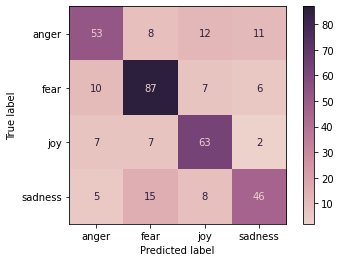

In [85]:
from sklearn.linear_model import LogisticRegression

X_train = train_df['sentence_vector'].apply(pd.Series).fillna(0)
y_train = train_df['emotion']

X_test = test_df['sentence_vector'].apply(pd.Series).fillna(0)
y_test = test_df['emotion']

google_LR_model = LogisticRegression()
google_LR_model = google_LR_model.fit(X_train, y_train)

y_train_pred = google_LR_model.predict(X_train)
y_test_pred = google_LR_model.predict(X_test)

acc_train = accuracy_score(y_true=y_train, y_pred=y_train_pred)
acc_test = accuracy_score(y_true=y_test, y_pred=y_test_pred)

print('training accuracy: {}'.format(round(acc_train, 2)))
print('testing accuracy: {}'.format(round(acc_test, 2)))
print('----------------------------')
print(classification_report(y_true=y_test, y_pred=y_test_pred))
plot_confusion_matrix(google_LR_model, X_test, y_test, cmap=sns.cubehelix_palette(as_cmap=True))

training accuracy: 0.47
testing accuracy: 0.46
----------------------------
              precision    recall  f1-score   support

       anger       0.43      0.37      0.40        84
        fear       0.46      0.61      0.52       110
         joy       0.56      0.62      0.59        79
     sadness       0.34      0.19      0.24        74

    accuracy                           0.46       347
   macro avg       0.45      0.45      0.44       347
weighted avg       0.45      0.46      0.45       347



/Users/manu/data_mining/venv/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


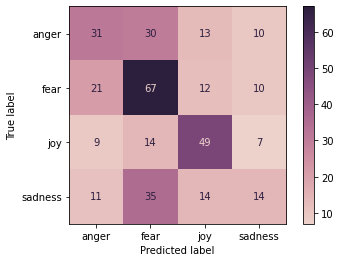

In [87]:
X_train = train_df['sentence_vector_2'].apply(pd.Series).fillna(0)
y_train = train_df['emotion']

X_test = test_df['sentence_vector_2'].apply(pd.Series).fillna(0)
y_test = test_df['emotion']

twitter_LR_model = LogisticRegression()
twitter_LR_model = twitter_LR_model.fit(X_train, y_train)

y_train_pred = twitter_LR_model.predict(X_train)
y_test_pred = twitter_LR_model.predict(X_test)

acc_train = accuracy_score(y_true=y_train, y_pred=y_train_pred)
acc_test = accuracy_score(y_true=y_test, y_pred=y_test_pred)

print('training accuracy: {}'.format(round(acc_train, 2)))
print('testing accuracy: {}'.format(round(acc_test, 2)))
print('----------------------------')
print(classification_report(y_true=y_test, y_pred=y_test_pred))
plot_confusion_matrix(twitter_LR_model, X_test, y_test, cmap=sns.cubehelix_palette(as_cmap=True))

The google model does a lot better than the twitter one, probably because of the different dimensionality; averaging the word vectors will lead to information loss, and the negative effect is more pronounced with few dimensions.

In [33]:
word_list = ['happy', 'angry', 'sad', 'fear']

topn = 15
happy_words = ['happy'] + [word_ for word_, sim_ in w2v_google_model.most_similar('happy', topn=topn)]
angry_words = ['angry'] + [word_ for word_, sim_ in w2v_google_model.most_similar('angry', topn=topn)]        
sad_words = ['sad'] + [word_ for word_, sim_ in w2v_google_model.most_similar('sad', topn=topn)]        
fear_words = ['fear'] + [word_ for word_, sim_ in w2v_google_model.most_similar('fear', topn=topn)]        

print('happy_words: ', happy_words)
print('angry_words: ', angry_words)
print('sad_words: ', sad_words)
print('fear_words: ', fear_words)

target_words = happy_words + angry_words + sad_words + fear_words
print('\ntarget words: ')
print(target_words)

print('\ncolor list:')
cn = topn + 1
color = ['b'] * cn + ['g'] * cn + ['r'] * cn + ['y'] * cn
print(color)

happy_words:  ['happy', 'glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled', 'satisfied', 'proud', 'delighted', 'disappointed', 'excited', 'happier', 'Said_Hirschbeck', 'elated', 'thankful', 'unhappy']
angry_words:  ['angry', 'irate', 'enraged', 'indignant', 'incensed', 'annoyed', 'agitated', 'frustrated', 'furious', 'unhappy', 'outraged', 'livid', 'irritated', 'exasperated', 'angrier', 'Angry']
sad_words:  ['sad', 'saddening', 'Sad', 'saddened', 'heartbreaking', 'disheartening', 'Meny_Friedman', 'parishioner_Pat_Patello', 'saddens_me', 'distressing', 'reminders_bobbing', 'Turkoman_Shiites', 'saddest', 'unfortunate', 'sorry', 'bittersweet']
fear_words:  ['fear', 'fearful', 'fears', 'Fear', 'fearing', 'worry', 'dread', 'feared', 'anxiety', 'apprehension', 'afraid', 'worries', 'concern', 'distrust', 'worried', 'Fearful']

target words: 
['happy', 'glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled', 'satisfied', 'proud', 'delighted', 'disappointed', 'excited', 'happier', 'Said_Hirsc

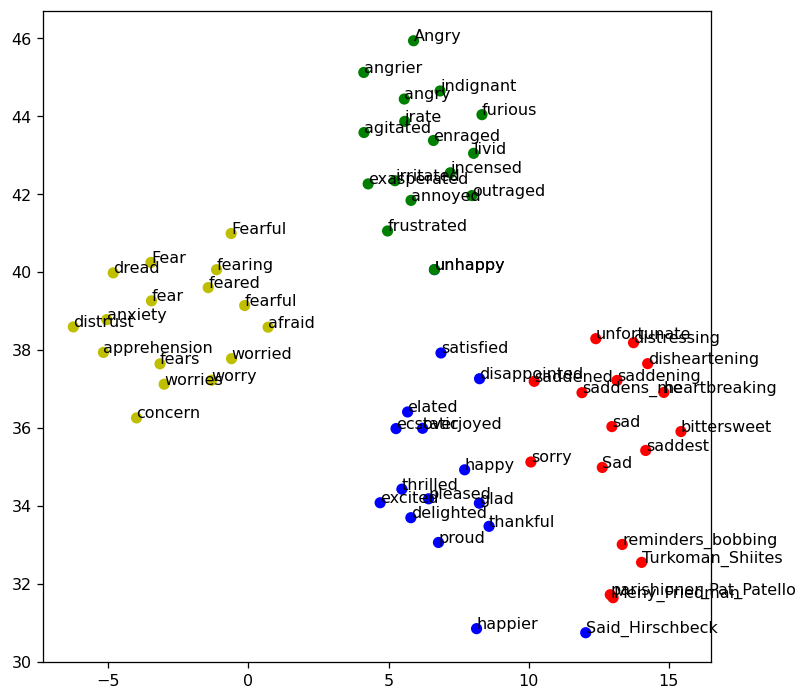

In [40]:
%matplotlib inline
from sklearn.manifold import TSNE

## w2v model
model = w2v_google_model

## prepare training word vectors
size = 700
target_size = len(target_words)
all_word = list(model.vocab.keys())
word_train = target_words + all_word[:size]
X_train = model[word_train]

## t-SNE model
tsne = TSNE(n_components=2, metric='cosine', random_state=28)

## training
X_tsne = tsne.fit_transform(X_train)

## plot the result
plt.figure(figsize=(7.5, 7.5), dpi=115)
plt.scatter(X_tsne[:target_size, 0], X_tsne[:target_size, 1], c=color)
for label, x, y in zip(target_words, X_tsne[:target_size, 0], X_tsne[:target_size, 1]):
    plt.annotate(label, xy=(x,y), xytext=(0,0),  textcoords='offset points')
plt.show()

After trying different values for 'size', I found that 700 achives a good result. There is an outlier "Said_Hirschbeck" (?), which for other values of 'size' ends up much closer to the 'sad' cluster than to the 'happy' one.